In [1]:
import numpy as np
import maze as mz 
import mazep3 as mz3
import pandas as pd


# Problem 1

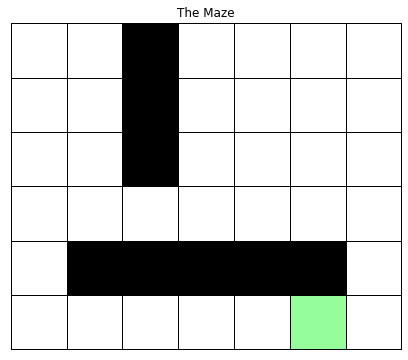

In [2]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 2, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

mz.draw_maze(maze)

# Create an environment maze
env = mz.Maze(maze)
#env.show()

## Dynamic Programming

In [3]:
# Finite horizon
horizon = 20
# Solve the MDP problem with dynamic programming 
V, policy0= mz.dynamic_programming(env,horizon);

In [4]:
# Simulate the shortest path starting from position A
method = 'DynProg';
start  = (0,0, 5, 5);
path = env.simulate(start, policy0, method, horizon);

# Show the shortest path
#mz.animate_solution(maze, path)

In [5]:
results = env.sample(start, policy0, method, horizon, 10000)
print("Probability of being eaten:",results[0])
print("Probability exiting:", results[1])
print("Probability of surviving the T=20 steps:",results[2])


Probability of being eaten: 0.0
Probability exiting: 0.8766
Probability of surviving the T=20 steps: 0.1234


## Value Iteration

In [6]:
gamma   = 0.95
epsilon = 0.0001
V, policy1= mz.value_iteration(env, gamma, epsilon)

In [7]:
# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0, 5,5);
path = env.simulate(start, policy1, method, horizon);
# Show the shortest path
#mz.animate_solution(maze, path)

In [8]:
results = env.sample(start, policy1, method, horizon, 10000)
print("Probability of being eaten:",results[0])
print("Probability exiting:", results[1])
print("Probability of surviving the T=20 steps:",results[2])

Probability of being eaten: 0.0
Probability exiting: 0.8657
Probability of surviving the T=20 steps: 0.1343


## Policy Iteration

In [9]:
gamma   = 0.95
V, policy2= mz.policy_iteration(env, gamma)

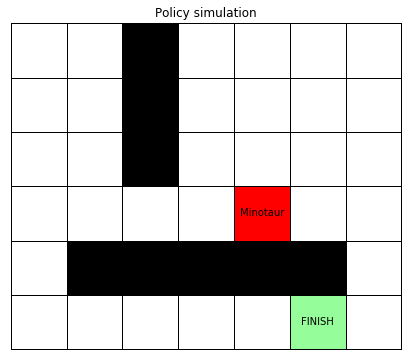

In [10]:
# Simulate the shortest path starting from position A
method = 'PolIter';
start  = (0,0, 5,5);
path = env.simulate(start, policy2, method, horizon);
# Show the shortest path
mz.animate_solution(maze, path)

In [11]:
results = env.sample(start, policy2, method, 10000, horizon)
print("Probability of being eaten:",results[0])
print("Probability exiting:", results[1])
print("Probability of surviving the T=20 steps:",results[2])

Probability of being eaten: 0.0
Probability exiting: 1.0
Probability of surviving the T=20 steps: 0.0


# Problem 3

In [3]:
# Description of the maze as a numpy array
maze3 = np.array([
    [0, 0, 0, 0],
    [0, 2, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]])

# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze

#mz3.draw_maze(maze3)
env3 = mz3.Maze(maze3)
T = 20



## Q-Learning

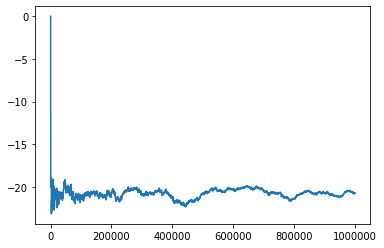

In [7]:
gamma3   = 0.8
Q, policy3 = mz3.Q_learning(env3, gamma3)

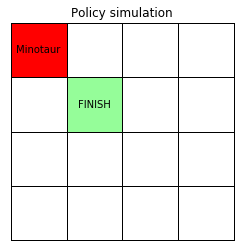

In [8]:
# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0,1,1);
path = env3.simulate(start, policy3, method,100);
# Show the shortest path
mz3.animate_solution(maze3, path)


## SARSA

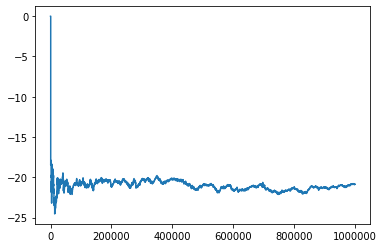

In [4]:
gamma3   = 0.8
epsilon3 = 0.1
Q, policy3 = mz3.SARSA(env3, gamma3, epsilon3)

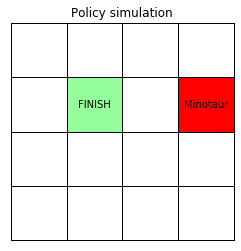

In [6]:
# Simulate the shortest path starting from position A
method = 'ValIter';
start  = (0,0,1,1);
path = env3.simulate(start, policy3, method,100);
# Show the shortest path
mz3.animate_solution(maze3, path)
